In [7]:
import pandas as pd 
import tensorflow as tf
import numpy as np
from tensorflow.keras.layers import Input, Conv2D, MaxPool2D, Dense, Flatten
from tensorflow.keras import Model 
from tensorflow.keras.utils import plot_model

# AlexNet

Paper: https://proceedings.neurips.cc/paper/2012/file/c399862d3b9d6b76c8436e924a68c45b-Paper.pdf

#### Alex Net Architecture 

In [8]:
from tensorflow.keras.layers import BatchNormalization, Dropout

def layer_step(input, filters,  kernel_size, strides ):
    x = Conv2D(filters=filters, kernel_size=kernel_size, strides=strides, padding='same', activation='relu')(input)
    x = BatchNormalization()(x)
    x = MaxPool2D( pool_size=3, strides=2, padding='same')(x)
    return x


input = Input(shape=(224, 224, 3))
x = layer_step(input, filters=96, kernel_size=11, strides=4)
x = layer_step(x, filters=256, kernel_size=5, strides=1)
x = layer_step(x, filters=384, kernel_size=3, strides=1)
x = layer_step(x, filters=384, kernel_size=3, strides=1)
x = layer_step(x, filters=256, kernel_size=3, strides=1)
x = Flatten()(x)
x = Dense(4096, activation='relu')(x)
x = Dense(4096, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(1000, activation='softmax')(x)
model = Model(input, x)

In [9]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 56, 56, 96)        34944     
_________________________________________________________________
batch_normalization_5 (Batch (None, 56, 56, 96)        384       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 28, 28, 96)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 28, 28, 256)       614656    
_________________________________________________________________
batch_normalization_6 (Batch (None, 28, 28, 256)       1024      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 256)       0   

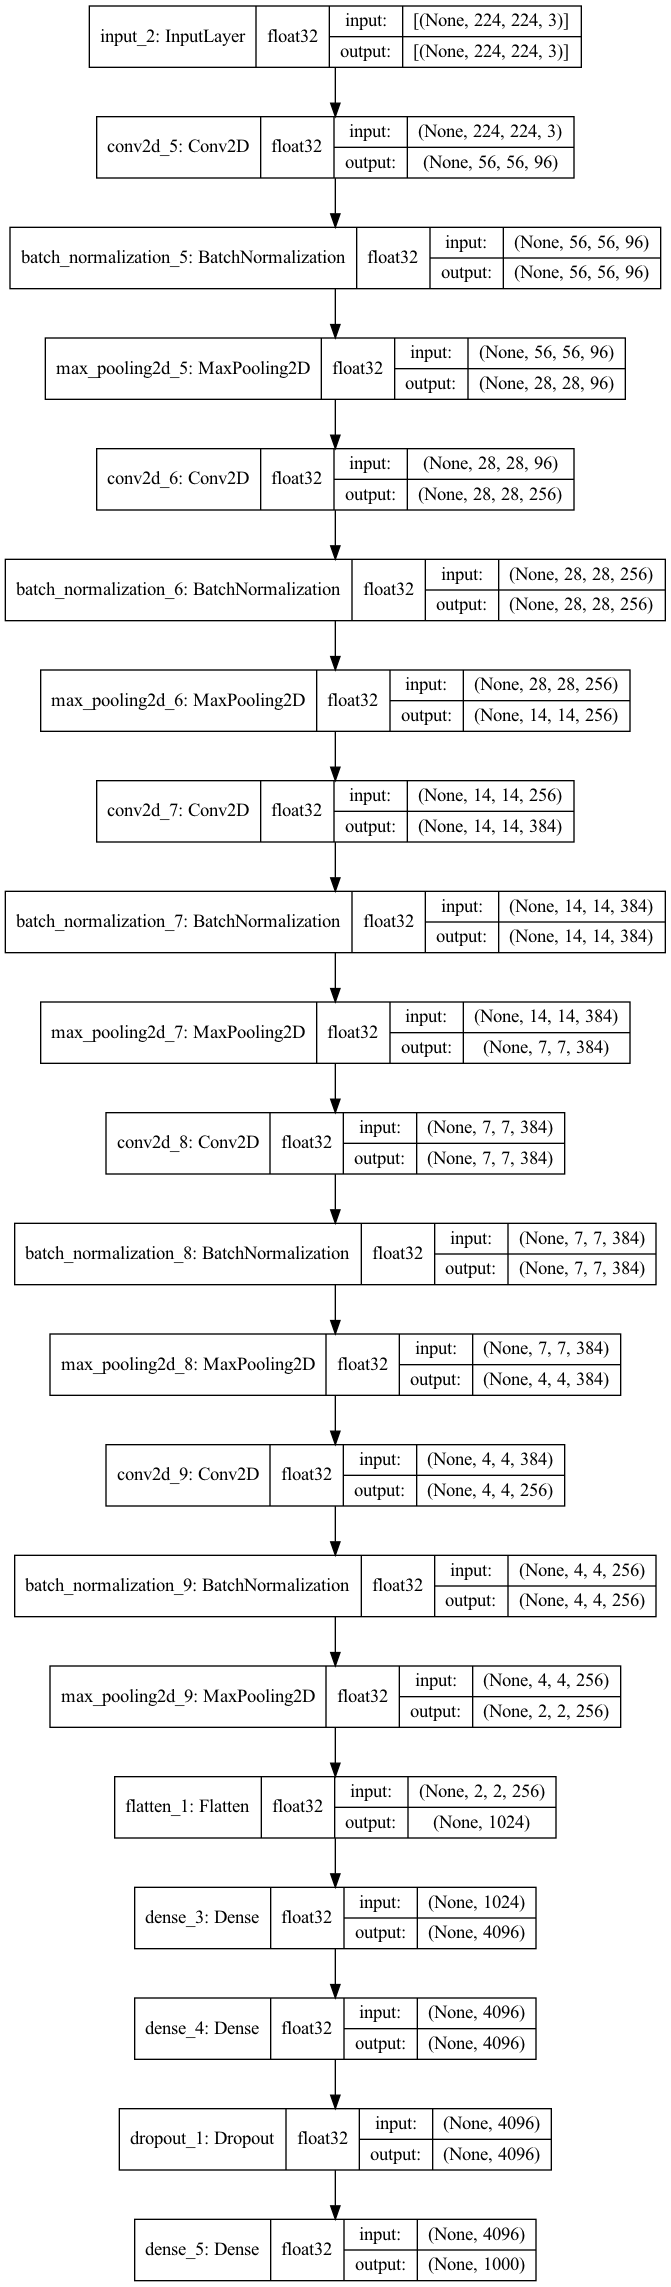

In [17]:
plot_model(model, 
    show_shapes=True,
    show_dtype=True,
    show_layer_names=True,
    expand_nested=True,
    dpi=96
)